In [1]:
import logging, gsw, time, xrft, datetime, os, glob, xgcm, matplotlib, xarray as xr, numpy as np, dask.array as da, pandas as pd, cartopy.crs as ccrs
from scipy import signal, fft
import matplotlib.patches as patches
import cartopy.mpl.ticker as cticker, string
import matplotlib.ticker as mticker
from matplotlib import animation
from IPython.display import HTML
from mpl_toolkits.basemap import Basemap, cm, shiftgrid
import matplotlib.pyplot as plt, matplotlib.colors as colors, matplotlib.dates as mdates
from dask.distributed import Client, LocalCluster
cluster = LocalCluster(n_workers=12)
client = Client(cluster)
matplotlib.rcParams['animation.embed_limit'] = 2**128

/home/fcampos/miniconda3/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35521 instead
  warnings.warn(


In [2]:
time = pd.date_range("2020-01-01", "2021-02-23 23:00:00", freq="h")
time2 = pd.date_range("2020-05-01", "2021-02-23  23:00:00", freq="h")
time3 = pd.date_range("2020-01-20", "2021-02-23  23:00:00", freq="h")

Ro2 = xr.open_mfdataset("./ro_coas.nc", parallel=True,).Ro#.compute()
Ro2["time"]=time2
Ro = xr.open_mfdataset("./ro_llc.nc", parallel=True,).Ro#.compute()
Ro["time"]=time
divh2 = xr.open_mfdataset("./divh_coas.nc", parallel=True,).divn#.compute()
divh2["time"]=time2
divh = xr.open_mfdataset("./divh_llc.nc", parallel=True,).divn#.compute()
divh["time"]=time

In [3]:
fi_coas = np.load('./KPPhbl_timeserie_COAS.npz',allow_pickle=True)
fi_llc = np.load('./KPPhbl_timeserie_llc2160_uncoupled.npz',allow_pickle=True)
dates_llc, mld_llc = fi_llc['dates'], fi_llc['kpphbl']
dates_coas, mld_coas = fi_coas['dates'], fi_coas['kpphbl']

In [4]:
def running_mean_xarray(data_array, window_size, dim):
    """Compute the running mean along the specified dimension."""
    return data_array.rolling({dim: window_size}, min_periods=1, center=True).mean()


mov_Ro2 = running_mean_xarray(Ro2, 30*24, 'time')
mov_Ro = running_mean_xarray(Ro, 30*24, 'time')
mov_divh2 = running_mean_xarray(divh2, 30*24, 'time')
mov_divh = running_mean_xarray(divh, 30*24, 'time')

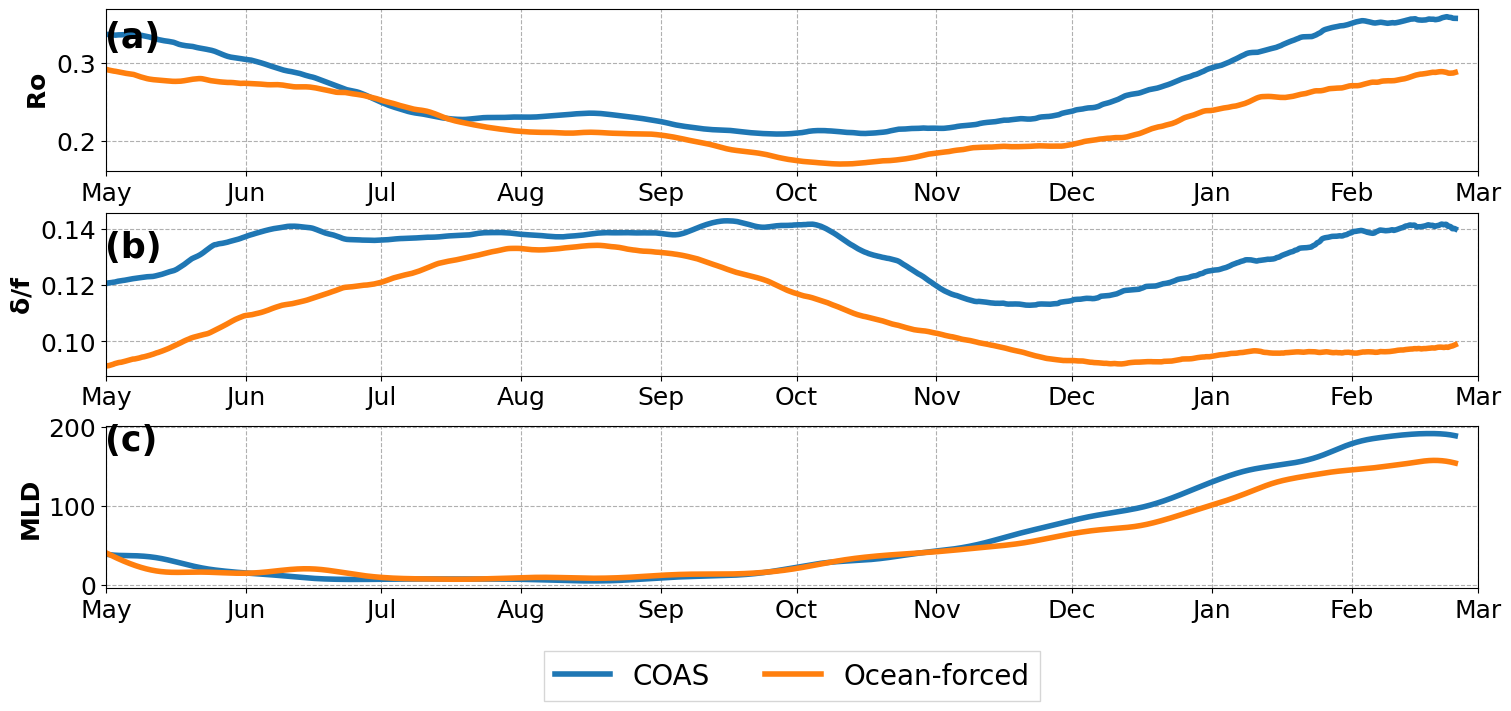

In [13]:
fig, (ax) = plt.subplots(3,1, figsize=(15,7), constrained_layout=True)

ax[0].plot(time2,mov_Ro2.compute(), color="#1f77b4", linewidth=4, label="COAS")
ax[0].plot(time,mov_Ro.compute(), color="#ff7f0e", linewidth=4, label="Ocean-forced")
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[0].set_ylabel("$\mathbf{Ro}$", fontweight="bold", size=18)
#ax1.legend(loc = "upper right", prop={'size': 13})
ax[0].tick_params(axis="both", labelsize=18)
ax[0].grid(linestyle="--")
ax[0].set_xlim((datetime.date(2012, 5, 1), datetime.date(2012, 12, 31)))
ax[0].set_xlim((datetime.date(2020, 5, 1), datetime.date(2021, 3, 1)))
#ax.set_ylim(0.13,0.44)
#ax[0].legend(loc = "upper center", fontsize=18, ncol=2)
ax[0].text(time[2900],0.32, "(a)", fontweight="bold", color="black", fontsize=25)
#plt.savefig("../figures/RMS_Ro_v02.pdf", dpi=500) 

ax[1].plot(time2,mov_divh2.compute(), color="#1f77b4", linewidth=4, label="COAS")
ax[1].plot(time,mov_divh.compute(), color="#ff7f0e", linewidth=4, label="Ocean-forced")
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1].set_ylabel("$\mathbf{\delta}$/f", fontweight="bold", size=18)
#ax1.legend(loc = "upper right", prop={'size': 13})
ax[1].tick_params(axis="both", labelsize=18)
ax[1].grid(linestyle="--")
ax[1].set_xlim((datetime.date(2012, 5, 1), datetime.date(2012, 12, 31)))
ax[1].set_xlim((datetime.date(2020, 5, 1), datetime.date(2021, 3, 1)))
#ax.set_ylim(0.13,0.44)
#ax[1].legend(loc = "upper center", fontsize=18, ncol=2)
ax[1].text(time[2900],0.13, "(b)", fontweight="bold", color="black", fontsize=25)
#plt.savefig("../figures/RMS_Ro_v02.pdf", dpi=500) 


ax[2].plot(time2,mld_coas[2448:9624], color="#1f77b4", linewidth=4, label="COAS")
ax[2].plot(time3,mld_llc[0:9624], color="#ff7f0e", linewidth=4, label="Ocean-forced")
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[2].set_ylabel("MLD", fontweight="bold", size=18)
#ax1.legend(loc = "upper right", prop={'size': 13})
ax[2].tick_params(axis="both", labelsize=18)
ax[2].grid(linestyle="--")
ax[2].set_xlim((datetime.date(2012, 5, 1), datetime.date(2012, 12, 31)))
ax[2].set_xlim((datetime.date(2020, 5, 1), datetime.date(2021, 3, 1)))
#ax.set_ylim(0.13,0.44)
#ax[2].legend(loc = "upper center", fontsize=18, ncol=2)
ax[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
               fancybox=False, shadow=False, fontsize=20, ncol=2)

ax[2].text(time[2900],170, "(c)", fontweight="bold", color="black", fontsize=25)


plt.savefig("/home/fcampos/tmp/figure_06.pdf", dpi=500) 